# Proyecto Final Red Nacional de Protección al Consumidor
## Caso: Implementación de modelos problemas de predicción

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos no lineales aditivos y seleccionar aquel que tenga el mejor desempeño para resolver un problema de regresión. En particular, se deberán implementar modelos MARS y GAM.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.


### Datos

Para el desarrollo de este proyecto utilizaremos la base de datos del Sistema de Gestión de la Red Nacional de Protección al Consumidor, el cual recibe y gestiona la información correspondiente a los requerimientos que la ciudadanía eleva para que la Super Intendencia de Industria y Comercio en el país de
Colombia ampare sus derechos como consumidor, en aquellos casos que así aplique.  


### 0. Librerias a Importar y Funciones

### 1. EXPLORACION DE LOS DATOS
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [ ]:


url = 'https://drive.google.com/uc?id=1KqsUPG3jmqbefBFajc3yqerz4j4SpTPJ&export=download'

# Leer el archivo como lo estabas haciendo
ad_df = pd.read_csv(url, delimiter=';')
print(ad_df.shape)

(3991, 34)


#### Diccionario de Datos

- **FECHA_REGISTRO**: 'Fecha y hora en la que se registró el caso o la interacción.',
- **PROYECTO_RNPC**: 'Identificador o nombre del proyecto o programa bajo el cual se registra el caso.',
- **UNIDAD_DEPARTAMENTO**: 'Departamento o unidad administrativa donde se originó o registró el caso.',
- **DESTINO_DEPARTAMENTO**: 'Departamento de destino relacionado con el caso, si aplica.',
- **DESTINO_CIUDAD**: 'Ciudad de destino o implicada en el caso.',
- **ATENCION_TIPO_TRAMITE**: 'Tipo de trámite o servicio solicitado por el ciudadano.',
- **ATENCION_DESTINO**: 'Entidad o destino hacia donde se dirige la atención o el trámite.',
- **ATENCION_TEMA**: 'Tema específico de la atención o consulta realizada.',
- **ATENCION_MOTIVO**: 'Motivo de la atención o consulta.',
- **ATENCION_ESTADO**: 'Estado actual de la atención (ejemplo',
- **PERSONA_RANGO_EDAD**: 'Rango de edad de la persona que realiza la consulta o reporte.',
- **PERSONA_CONDICION_DISCAPACIDAD**: 'Indica si la persona tiene alguna condición de discapacidad.',
- **PERSONA_POBLACION_ESPECIAL**: 'Si la persona pertenece a alguna población especial (podría referirse a grupos vulnerables o minoritarios).',
- **PERSONA_GENERO**: 'Género de la persona.',
- **PERSONA_PROFESION**: 'Profesión u ocupación de la persona.',
- **PERSONA_ACEPTA_HABEAS_DATA**: 'Indica si la persona acepta el tratamiento de sus datos personales (Habeas Data).',
- **TIPO_EMPRESA**: 'Clasificación de la empresa involucrada (Formal, Informal).',
- **EMPRESA_TIPO_DOCUMENTO**: 'Tipo de documento de identificación de la empresa (NIT, CC, etc.).',
- **EMPRESA_NUMERO_DOCUMENTO**: 'Número de documento de identificación de la empresa.',
- **EMPRESA_RAZON_SOCIAL**: 'Razón social de la empresa involucrada.',
- **ESTADO_SERVICIO**: 'Estado actual del servicio o caso (Agendado, Cerrado).',
- **CAUSAL**: 'Causa o razón detrás de la consulta o problema reportado.',
- **TIPO_PRODUCTO**: 'Tipo de producto implicado en el caso (Bien, Servicio).',
- **VALOR_PRODUCTO**: 'Valor monetario del producto o servicio implicado.',
- **FECHA_ADQUISICION**: 'Fecha en la que se adquirió el producto o servicio.',
- **FECHA_ULTIMO_ENCUENTRO**: 'Fecha del último encuentro o interacción relacionada con el caso.',
- **FECHA_FIN_ULTIMO_ENCUENTRO**: 'Fecha de finalización del último encuentro, si aplica.',
- **FECHA_FIN_REAL**: 'Fecha de finalización del último encuentro, si FECHA_FIN_ULTIMO_ENCUENTRO es vacio entonces toma el valor FECHA_ULTIMO_ENCUENTRO.',
- **ENCUENTRO_ACORDADO**: 'Indica si se acordó algún encuentro o seguimiento.',
- **FECHA_CONTRATO**: 'Fecha en la que se firmó un contrato relacionado con el caso, si aplica.',
- **DURACION**: 'Cantidad de días que se demora un regidtro en ser finalizado.',        

In [ ]:
ad_df.head()

,PAID,FECHA_REGISTRO,UNIDAD_NOMBRE,PROYECTO_RNPC,UNIDAD_DEPARTAMENTO,DESTINO_DEPARTAMENTO,DESTINO_CIUDAD,ATENCION_TIPO_TRAMITE,ATENCION_DESTINO,ATENCION_TEMA,...,TIPO_PRODUCTO,NOMBRE_PRODUCTO,VALOR_PRODUCTO,FECHA_ADQUISICION,FECHA_ULTIMO_ENCUENTRO,FECHA_FIN_ULTIMO_ENCUENTRO,FECHA_FIN_REAL,ENCUENTRO_ACORDADO,FECHA_CONTRATO,DURACION
0,615062,2022-01-21,CB SAN CRISTOBAL,Casas del Consumidor Bogota,BOGOTA,BOGOTA,SAN CRISTOBAL,ARREGLO DIRECTO,SIC,Garantías,...,Bien,FABRICACION SOPORTE CAMA,220000,2021-03-30 00:00,2022-01-31,2022-02-01,2022-02-01,SI,2022-02-01 14:35,11
1,365005,2021-03-05,CB FONTIBON,Casas del Consumidor Bogota,BOGOTA,BOGOTA,FONTIBON,ARREGLO DIRECTO,SIC,Prestación de servicios que suponen la entrega...,...,Bien,cama de 1.40x190 tapizada,180000,2020-12-03 00:00,2021-03-10,2021-03-10,2021-03-10,SI,2021-03-10 11:05,5
2,317494,2020-10-28,CB FONTIBON,Casas del Consumidor Bogota,BOGOTA,BOGOTA,FONTIBON,ARREGLO DIRECTO,SIC,Garantías,...,Bien,celular,100000,2020-10-02 00:00,2020-10-28,2021-02-25,2021-02-25,SI,2021-02-25 13:25,120
3,325526,2020-11-11,CB SUBA,Casas del Consumidor Bogota,BOGOTA,BOGOTA,SUBA,ARREGLO DIRECTO,SIC,Información o publicidad engañosa,...,Bien,Vehiculo,22500000,2019-11-29 00:00,2020-11-26,2020-11-26,2020-11-26,SI,2020-11-26 11:32,15
4,458104,2021-07-14,CB SUBA,Casas del Consumidor Bogota,BOGOTA,BOGOTA,SUBA,ARREGLO DIRECTO,SIC,Garantías,...,Servicio,televisor 60 pulgadas marca LG,2600000,2018-05-16 00:00,2021-08-05,2021-08-05,2021-08-05,SI,2021-08-05 12:39,22


In [ ]:
df_no_paid = ad_df.drop(columns=['PAID'])
df_no_paid.describe()

,DURACION
count,3991.000000
mean,15.578552
std,38.949003
min,0.000000
25%,6.000000
50%,9.000000
75%,15.000000
max,1022.000000


In [ ]:
# Filtrar el DataFrame para las columnas de interés
columns_of_interest = ['ATENCION_MOTIVO', 'DURACION', 'ESTADO_SERVICIO']
filtered_df = ad_df[columns_of_interest]

# Obtener información detallada solo para estas columnas
print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3991 entries, 0 to 3990
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ATENCION_MOTIVO  3991 non-null   object
 1   DURACION         3991 non-null   int64 
 2   ESTADO_SERVICIO  3991 non-null   object
dtypes: int64(1), object(2)
memory usage: 93.7+ KB
None


In [ ]:
print(filtered_df.describe(include=[object]))

                                   ATENCION_MOTIVO ESTADO_SERVICIO
count                                         3991            3991
unique                                          38              10
top     Incumplimiento de los términos de garantía         CERRADO
freq                                          2418            1969


In [ ]:
print(filtered_df.describe(include=[int, float]))

          DURACION
count  3991.000000
mean     15.578552
std      38.949003
min       0.000000
25%       6.000000
50%       9.000000
75%      15.000000
max    1022.000000


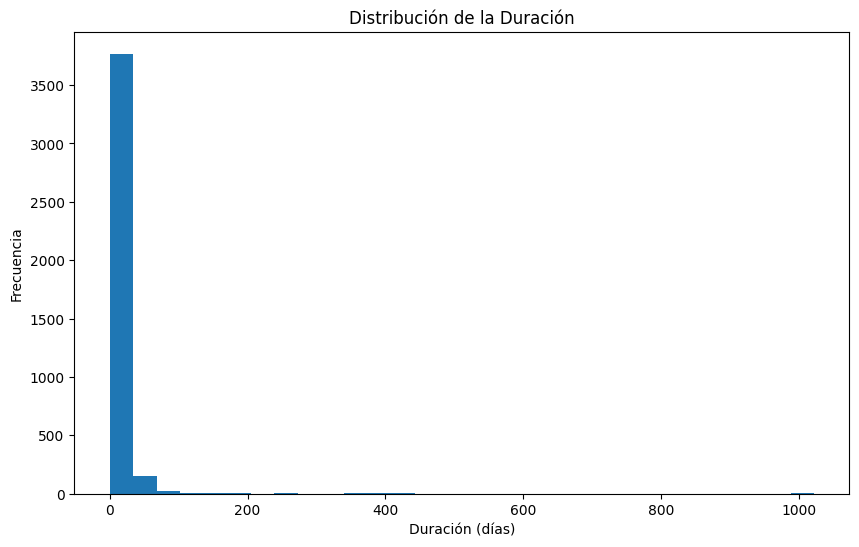

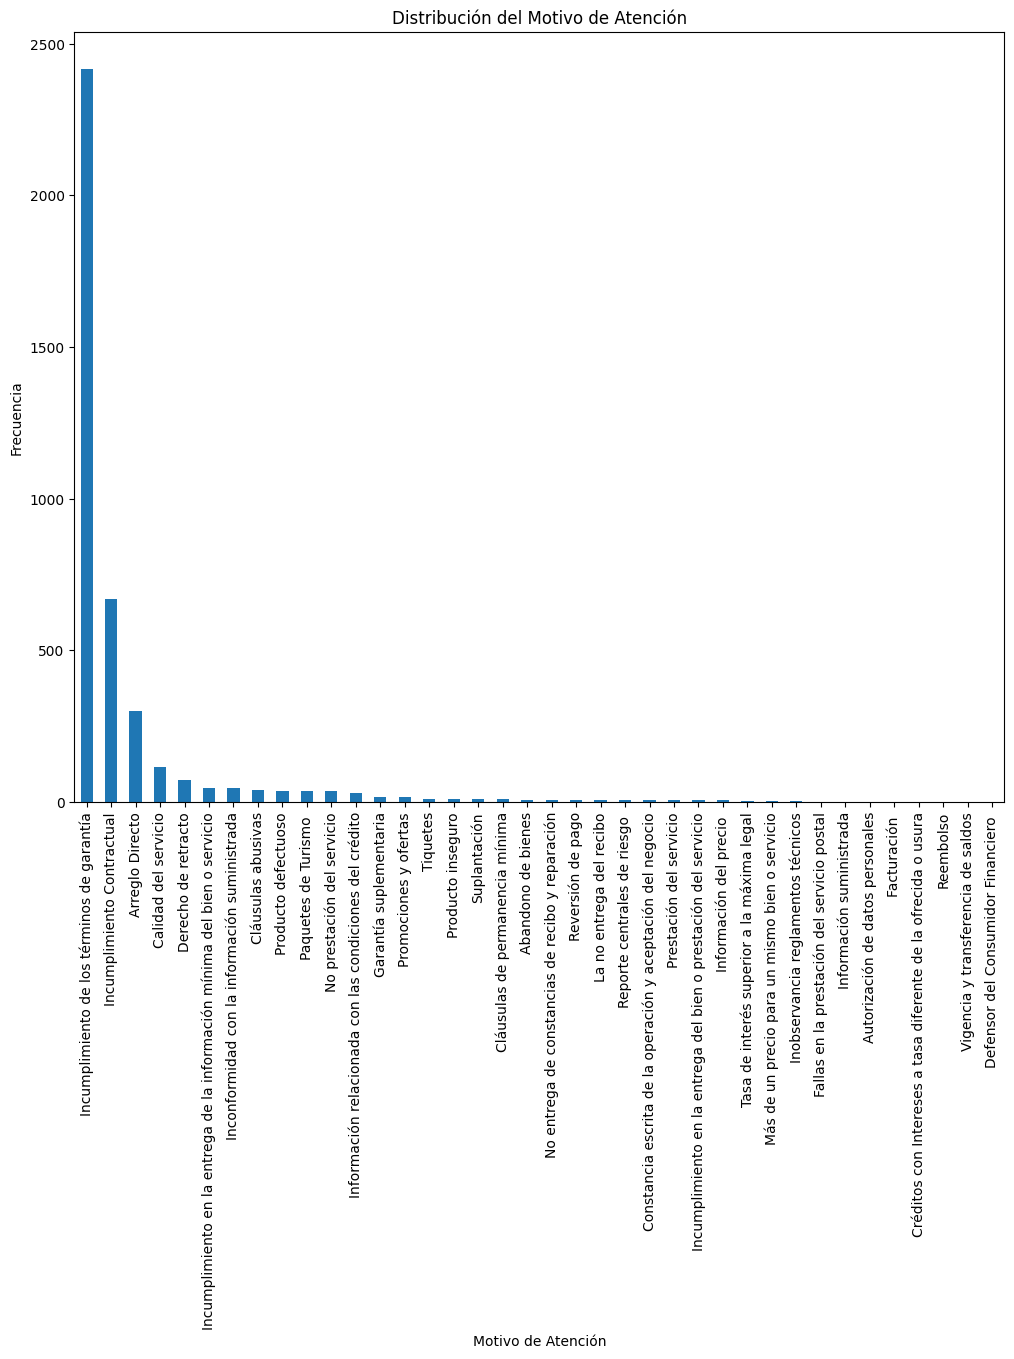

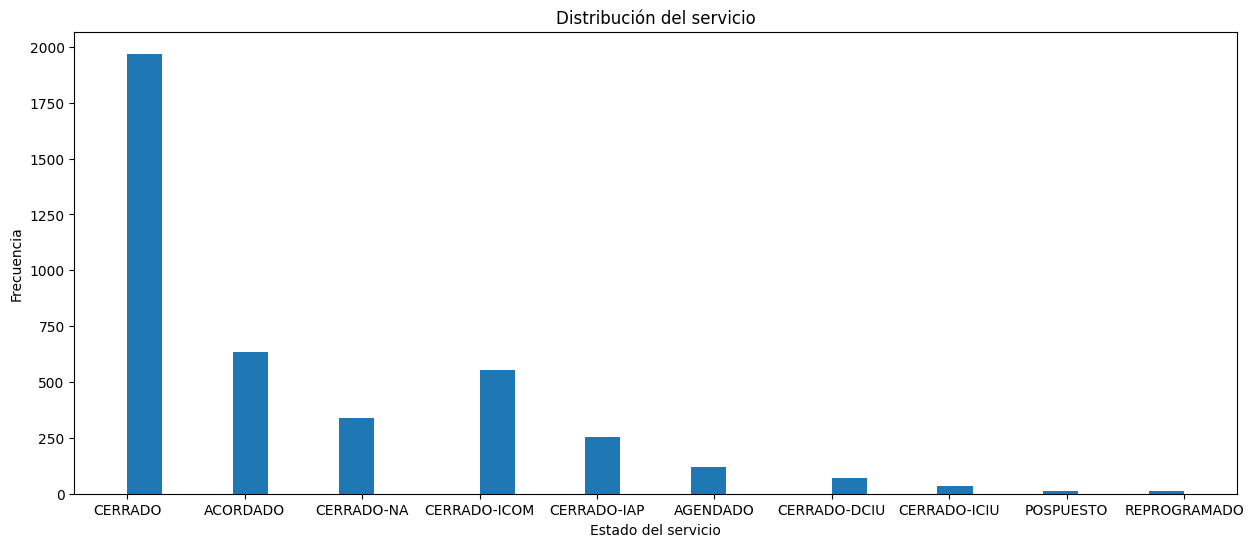

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de DURACION
plt.figure(figsize=(10, 6))
ad_df['DURACION'].hist(bins=30)
plt.title('Distribución de la Duración')
plt.xlabel('Duración (días)')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()


plt.figure(figsize=(12, 10))
ad_df['ATENCION_MOTIVO'].value_counts().plot(kind='bar')
plt.title('Distribución del Motivo de Atención')
plt.xlabel('Motivo de Atención')
plt.ylabel('Frecuencia')

# Rotar las etiquetas del eje X
plt.xticks(rotation=90)

plt.grid(False)
plt.show()

plt.figure(figsize=(15, 6))
ad_df['ESTADO_SERVICIO'].hist(bins=30)
plt.title('Distribución del servicio')
plt.xlabel('Estado del servicio')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()




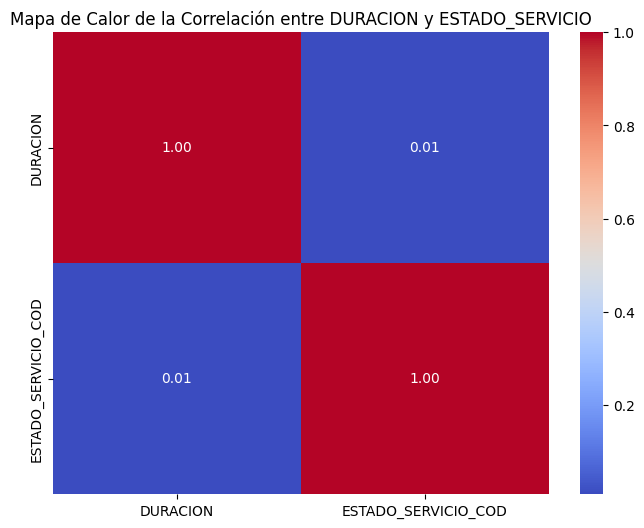

In [ ]:
# Codificar la variable categórica ESTADO_SERVICIO
ad_df['ESTADO_SERVICIO_COD'] = ad_df['ESTADO_SERVICIO'].astype('category').cat.codes

# Seleccionar las columnas numéricas
heatmap_data = ad_df[['DURACION', 'ESTADO_SERVICIO_COD']]

# Calcular la matriz de correlación
corr_matrix = heatmap_data.corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de la Correlación entre DURACION y ESTADO_SERVICIO')
plt.show()

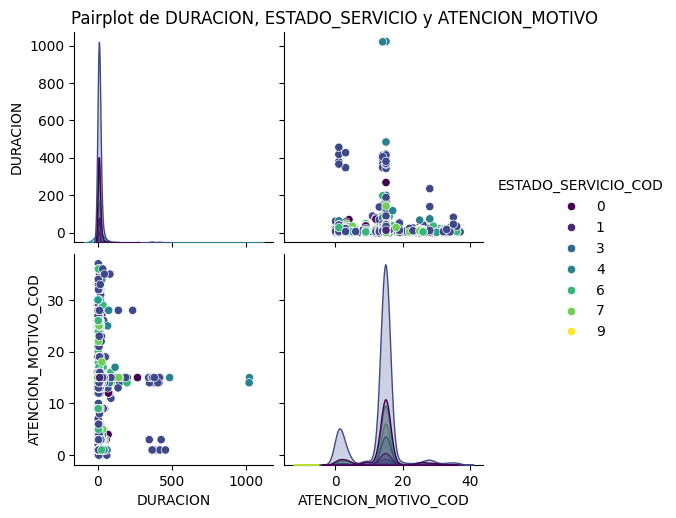

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Codificar las variables categóricas
ad_df['ESTADO_SERVICIO_COD'] = ad_df['ESTADO_SERVICIO'].astype('category').cat.codes
ad_df['ATENCION_MOTIVO_COD'] = ad_df['ATENCION_MOTIVO'].astype('category').cat.codes

# Seleccionar las columnas de interés para el pairplot
pairplot_df = ad_df[['DURACION', 'ESTADO_SERVICIO_COD', 'ATENCION_MOTIVO_COD']]

# Crear el pairplot
sns.pairplot(pairplot_df, kind="scatter", hue='ESTADO_SERVICIO_COD', palette='viridis')
plt.suptitle('Pairplot de DURACION, ESTADO_SERVICIO y ATENCION_MOTIVO', y=1.02)
plt.show()

In [ ]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3991 entries, 0 to 3990
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   PAID                            3991 non-null   int64 
 1   FECHA_REGISTRO                  3991 non-null   object
 2   UNIDAD_NOMBRE                   3991 non-null   object
 3   PROYECTO_RNPC                   3991 non-null   object
 4   UNIDAD_DEPARTAMENTO             3991 non-null   object
 5   DESTINO_DEPARTAMENTO            3991 non-null   object
 6   DESTINO_CIUDAD                  3991 non-null   object
 7   ATENCION_TIPO_TRAMITE           3991 non-null   object
 8   ATENCION_DESTINO                3991 non-null   object
 9   ATENCION_TEMA                   3991 non-null   object
 10  ATENCION_MOTIVO                 3991 non-null   object
 11  ATENCION_ESTADO                 3991 non-null   object
 12  PERSONA_RANGO_EDAD              3991 non-null   

In [ ]:
null_counts = ad_df.isnull().sum()
print(null_counts)

has_nulls = ad_df.isnull().values.any()
has_nulls

PAID                                 0
FECHA_REGISTRO                       0
UNIDAD_NOMBRE                        0
PROYECTO_RNPC                        0
UNIDAD_DEPARTAMENTO                  0
DESTINO_DEPARTAMENTO                 0
DESTINO_CIUDAD                       0
ATENCION_TIPO_TRAMITE                0
ATENCION_DESTINO                     0
ATENCION_TEMA                        0
ATENCION_MOTIVO                      0
ATENCION_ESTADO                      0
PERSONA_RANGO_EDAD                   0
PERSONA_CONDICION_DISCAPACIDAD       0
PERSONA_POBLACION_ESPECIAL           0
PERSONA_GENERO                       0
PERSONA_PROFESION                    0
PERSONA_ACEPTA_HABEAS_DATA           0
TIPO_EMPRESA                         0
EMPRESA_TIPO_DOCUMENTO            1591
EMPRESA_TIPO_DOCUMENTO.1             0
EMPRESA_RAZON_SOCIAL                 0
ESTADO_SERVICIO                      0
CAUSAL                               0
TIPO_PRODUCTO                        0
NOMBRE_PRODUCTO          

True

In [ ]:
ad_df['DURACION'] = pd.to_numeric(ad_df['DURACION'], errors='coerce')

ad_df = ad_df[pd.to_numeric(ad_df['DURACION'], errors='coerce').notnull()]


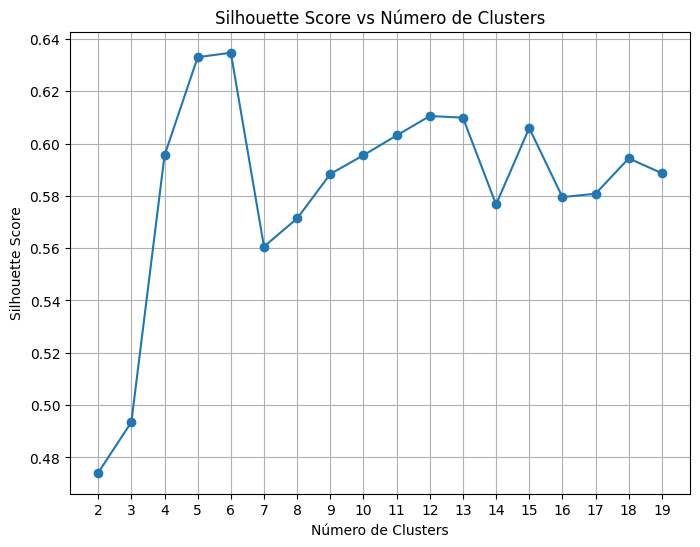

In [ ]:
data = ad_df[['ATENCION_MOTIVO', 'DURACION', 'ESTADO_SERVICIO']].copy()

label_encoder = LabelEncoder()
data['ATENCION_MOTIVO'] = label_encoder.fit_transform(data['ATENCION_MOTIVO'])
data['ESTADO_SERVICIO'] = label_encoder.fit_transform(data['ESTADO_SERVICIO'])


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

range_n_clusters = np.arange(2, 20, 1)
scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, scores, marker='o', linestyle='-')
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Número de Clusters")
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()


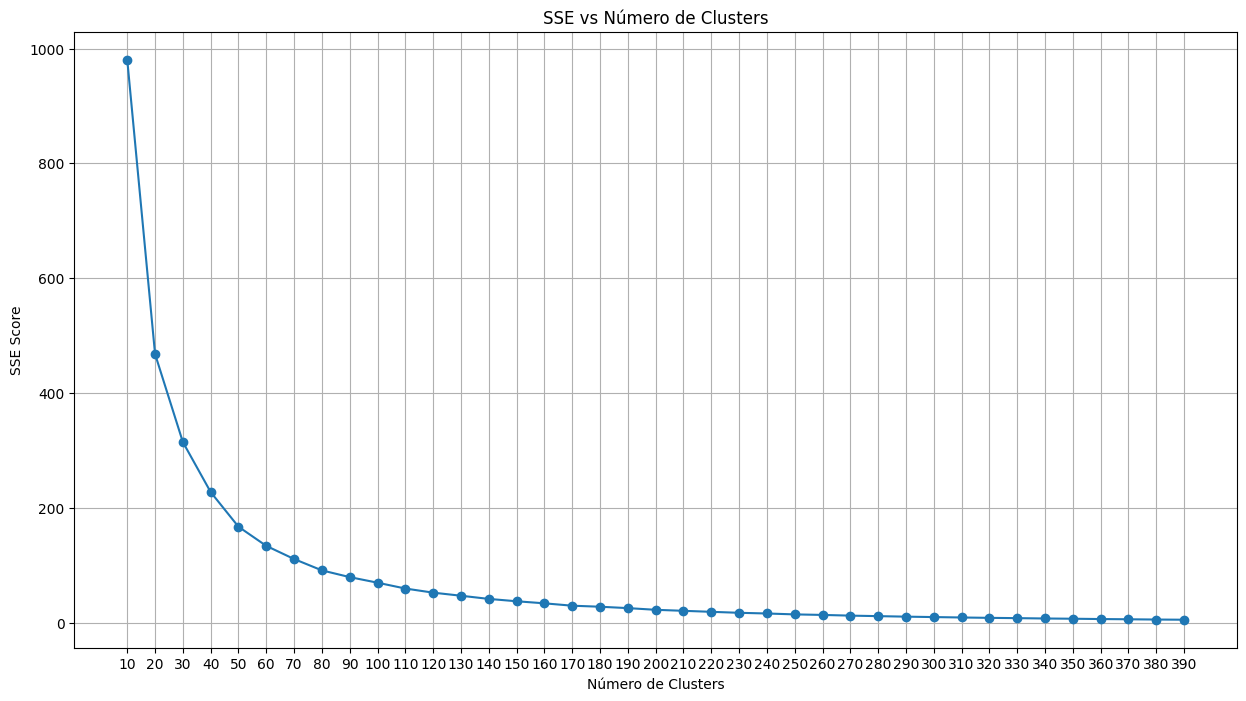

In [ ]:
sse = []
range_n_clusters = np.arange(10, 400, 10)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=123, n_init=10)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Visualizar resultados
plt.figure(figsize=(15, 8))
plt.plot(range_n_clusters, sse, marker='o', linestyle='-')
plt.xlabel("Número de Clusters")
plt.ylabel("SSE Score")
plt.title("SSE vs Número de Clusters")
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

Dado que el Silhouette Score proporciona una mejor evaluación de la calidad de los clústeres, y sugiere un número óptimo más bajo, se elege un número de clústeres en ese rango. Por lo tanto, 6 clústeres serían una elección más adecuada según estos resultados.

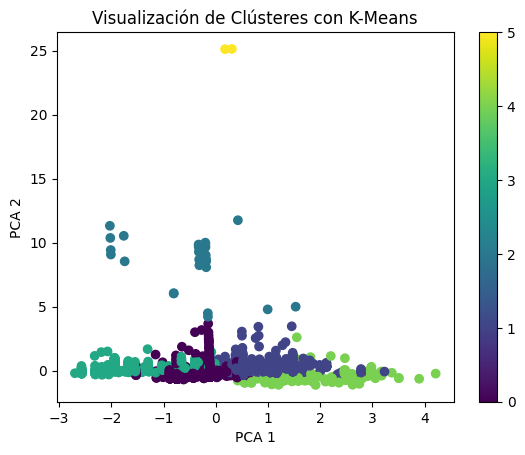

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=123, n_init=10)
kmeans.fit(data_scaled)
labels = kmeans.labels_

ad_df['Cluster'] = labels

pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualización de Clústeres con K-Means')
plt.colorbar()
plt.show()


In [ ]:
silhouette_avg = silhouette_score(data_scaled, labels)
print(f'Silhouette Score para 6 clústeres: {silhouette_avg}')

Silhouette Score para 6 clústeres: 0.6352043968958938


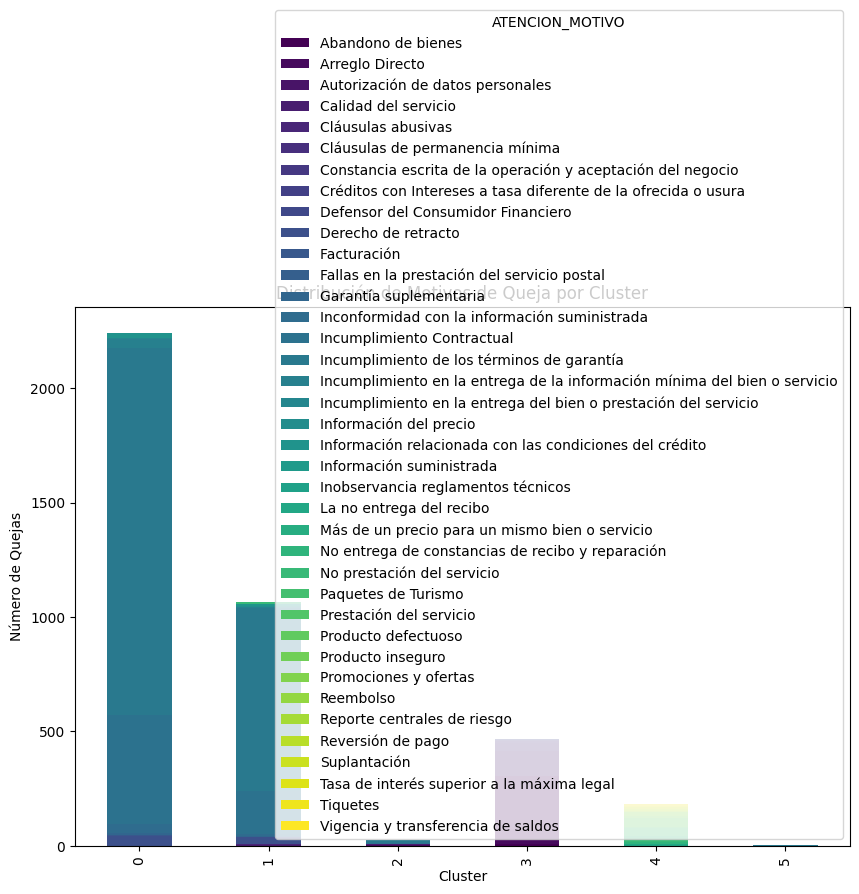

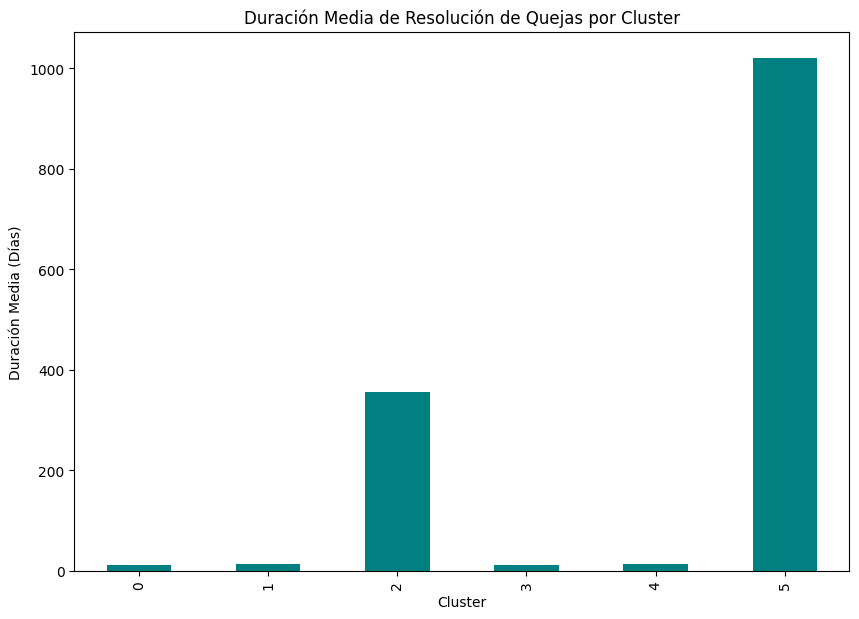

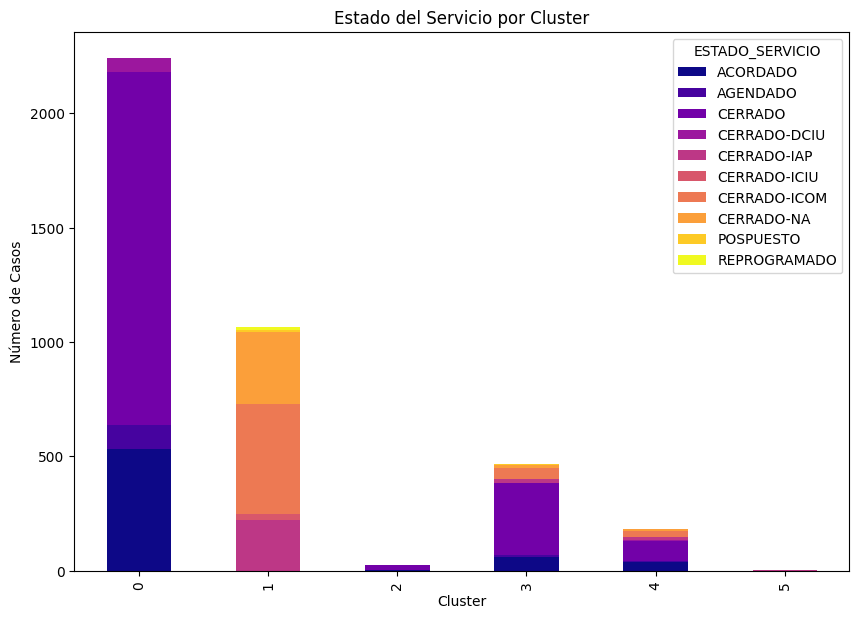

In [ ]:
motivo_cluster = ad_df.groupby(['Cluster', 'ATENCION_MOTIVO']).size().unstack(fill_value=0)

motivo_cluster.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
plt.title('Distribución de Motivos de Queja por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Quejas')
plt.show()

duracion_media_cluster = ad_df.groupby('Cluster')['DURACION'].mean()

duracion_media_cluster.plot(kind='bar', figsize=(10, 7), color='teal')
plt.title('Duración Media de Resolución de Quejas por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Duración Media (Días)')
plt.show()

estado_cluster = ad_df.groupby(['Cluster', 'ESTADO_SERVICIO']).size().unstack(fill_value=0)

estado_cluster.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='plasma')
plt.title('Estado del Servicio por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Casos')
plt.show()

Los hallazgos de las gráficas muestran que el análisis K-means con 6 clusters es óptimo, alcanzando un Silhouette Score de 0.63, lo que indica una adecuada diferenciación entre grupos de quejas. La visualización de los clusters mediante PCA revela una clara separación entre ellos, lo que permite identificar patrones distintos en el manejo y resolución de quejas. Además, la distribución del estado del servicio dentro de cada cluster destaca diferencias en la eficiencia de resolución, con algunos clusters mostrando mayor proporción de casos cerrados y otros enfrentando más reprogramaciones, lo que sugiere áreas de mejora en los procesos de atención.

In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.8 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn-extra

In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
ad_df['ATENCION_MOTIVO'] = label_encoder.fit_transform(ad_df['ATENCION_MOTIVO'])
ad_df['ESTADO_SERVICIO'] = label_encoder.fit_transform(ad_df['ESTADO_SERVICIO'])

# Escalar las características
scaler = StandardScaler()
data_scaled = scaler.fit_transform(ad_df[['ATENCION_MOTIVO', 'DURACION', 'ESTADO_SERVICIO']])

# Probar diferentes configuraciones de clústeres
for n_clusters in range(2, 7):  # Probar desde 2 hasta 6 clústeres
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=None)  # Eliminar el random_state fijo
    kmedoids.fit(data_scaled)
    if len(set(kmedoids.labels_)) > 1:  # Verificar que se formen múltiples clústeres
        silhouette_avg_kmedoids = silhouette_score(data_scaled, kmedoids.labels_)
        print(f'Silhouette Score para {n_clusters} clústeres: {silhouette_avg_kmedoids}')
    else:
        print(f'Con {n_clusters} clústeres, todos los puntos se asignan a un solo clúster.')

/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


Con 2 clústeres, todos los puntos se asignan a un solo clúster.


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Con 3 clústeres, todos los puntos se asignan a un solo clúster.


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(


Con 4 clústeres, todos los puntos se asignan a un solo clúster.


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(


Con 5 clústeres, todos los puntos se asignan a un solo clúster.
Con 6 clústeres, todos los puntos se asignan a un solo clúster.


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 5 

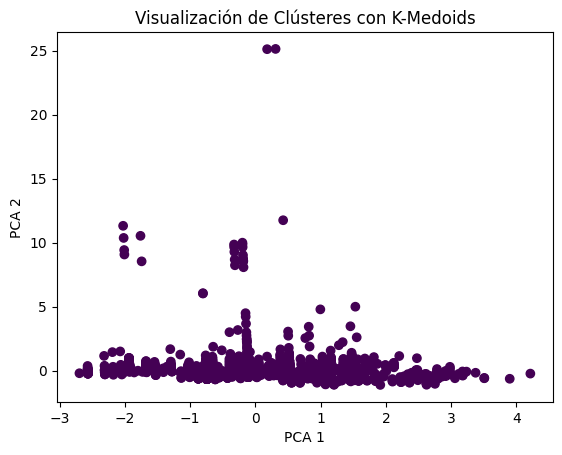

In [ ]:
# Visualizar los clústeres formados por K-medoids
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmedoids, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualización de Clústeres con K-Medoids')
plt.show()

## Procedimiento:

### Preparación de Datos:

***Limpieza***: Convertimos la columna 'DURACIÓN' a numérica y eliminamos filas con valores no numéricos para asegurar que los datos sean uniformes y manejables.

***Selección de Características***: Se seleccionaron las columnas 'ATENCIÓN_MOTIVO', 'DURACIÓN' y 'ESTADO_SERVICIO' para el análisis.

***Codificación y Escalado***: Las variables categóricas fueron transformadas a numéricas mediante LabelEncoder, y todos los datos fueron escalados usando StandardScaler para normalizar las características y facilitar el proceso de clustering.

### Implementación de K-medoids:

***Configuración del Algoritmo***: Se configuró K-medoids con diferentes números de clústeres (de 2 a 6), utilizando un estado aleatorio fijo para la reproducibilidad.

***Ejecución y Evaluación***: Se ejecutó K-medoids y se intentó evaluar la calidad de los clústeres mediante el Silhouette Score. Sin embargo, todos los puntos fueron asignados a un solo clúster en todos los casos.

## Análisis:

***Problema de Un Solo Clúster***: El resultado consistente de un solo clúster, independientemente del número de clústeres especificado, es indicativo de un problema con la inicialización del algoritmo o con la naturaleza de los datos.

***Posibles Factores Influenciantes***:

***Sensibilidad a la Inicialización***: K-medoids es sensible a la elección de los puntos iniciales, y la forma en que se seleccionan puede no ser representativa de la diversidad en los datos.

***Homogeneidad de Datos***: Los datos podrían no tener suficiente variabilidad o podrían estar dominados por valores atípicos, lo que afecta la capacidad del algoritmo para formar clústeres significativos.

## Conclusiones:

***Reevaluación de la Metodología de Clustering***: La repetida formación de un solo clúster sugiere que K-medoids podría no ser el algoritmo más adecuado para este conjunto de datos particular, posiblemente debido a su sensibilidad a la inicialización y a las características de los datos.

***Exploración de Alternativas***: Se recomienda probar otros algoritmos de clustering como DBSCAN, que no requiere especificación del número de clústeres y es más robusto a valores atípicos. Esto puede proporcionar insights adicionales sobre la estructura de los datos y su aptitud para diferentes métodos de clustering.

***Revisión de Preprocesamiento***: Puede ser útil experimentar con diferentes métodos de escalado, como MinMaxScaler, que podrían afectar diferentemente la distribución de los datos y su agrupación.

## DBSCAN

Para realizar la implementación con el algoritmo DBSCAN se utilizaron las variables `'VALOR_PRODUCTO'`, `'DURACION'`, `'ESTADO_SERVICIO'`, `'DESTINO_CIUDAD'`, `'PERSONA_POBLACION_ESPECIAL'`, `'PERSONA_RANGO_EDAD'`, `'PERSONA_CONDICION_DISCAPACIDAD'`, `'PERSONA_GENERO'`

Se procedió cargando los datos

In [ ]:
import pandas as pd
path = 'https://drive.google.com/uc?id=1KqsUPG3jmqbefBFajc3yqerz4j4SpTPJ&export=download'
# Cargar el archivo CSV
data = pd.read_csv(path, delimiter=';')

# Mostrar las primeras filas de los datos
data.head()

,PAID,FECHA_REGISTRO,UNIDAD_NOMBRE,PROYECTO_RNPC,UNIDAD_DEPARTAMENTO,DESTINO_DEPARTAMENTO,DESTINO_CIUDAD,ATENCION_TIPO_TRAMITE,ATENCION_DESTINO,ATENCION_TEMA,...,TIPO_PRODUCTO,NOMBRE_PRODUCTO,VALOR_PRODUCTO,FECHA_ADQUISICION,FECHA_ULTIMO_ENCUENTRO,FECHA_FIN_ULTIMO_ENCUENTRO,FECHA_FIN_REAL,ENCUENTRO_ACORDADO,FECHA_CONTRATO,DURACION
0,615062,2022-01-21,CB SAN CRISTOBAL,Casas del Consumidor Bogota,BOGOTA,BOGOTA,SAN CRISTOBAL,ARREGLO DIRECTO,SIC,Garantías,...,Bien,FABRICACION SOPORTE CAMA,220000,2021-03-30 00:00,2022-01-31,2022-02-01,2022-02-01,SI,2022-02-01 14:35,11
1,365005,2021-03-05,CB FONTIBON,Casas del Consumidor Bogota,BOGOTA,BOGOTA,FONTIBON,ARREGLO DIRECTO,SIC,Prestación de servicios que suponen la entrega...,...,Bien,cama de 1.40x190 tapizada,180000,2020-12-03 00:00,2021-03-10,2021-03-10,2021-03-10,SI,2021-03-10 11:05,5
2,317494,2020-10-28,CB FONTIBON,Casas del Consumidor Bogota,BOGOTA,BOGOTA,FONTIBON,ARREGLO DIRECTO,SIC,Garantías,...,Bien,celular,100000,2020-10-02 00:00,2020-10-28,2021-02-25,2021-02-25,SI,2021-02-25 13:25,120
3,325526,2020-11-11,CB SUBA,Casas del Consumidor Bogota,BOGOTA,BOGOTA,SUBA,ARREGLO DIRECTO,SIC,Información o publicidad engañosa,...,Bien,Vehiculo,22500000,2019-11-29 00:00,2020-11-26,2020-11-26,2020-11-26,SI,2020-11-26 11:32,15
4,458104,2021-07-14,CB SUBA,Casas del Consumidor Bogota,BOGOTA,BOGOTA,SUBA,ARREGLO DIRECTO,SIC,Garantías,...,Servicio,televisor 60 pulgadas marca LG,2600000,2018-05-16 00:00,2021-08-05,2021-08-05,2021-08-05,SI,2021-08-05 12:39,22


In [ ]:
data['VALOR_PRODUCTO'] = pd.to_numeric(data['VALOR_PRODUCTO'], errors='coerce')

Se muestran las siguientes visualizaciones

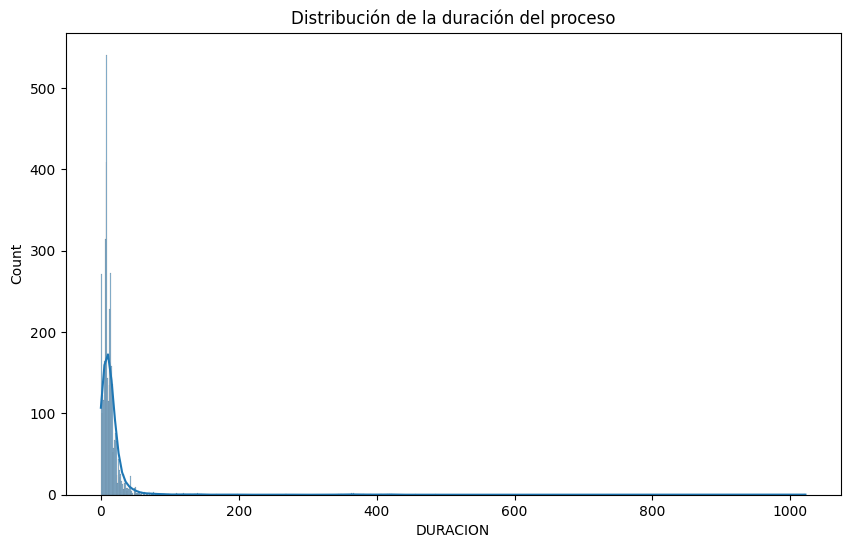

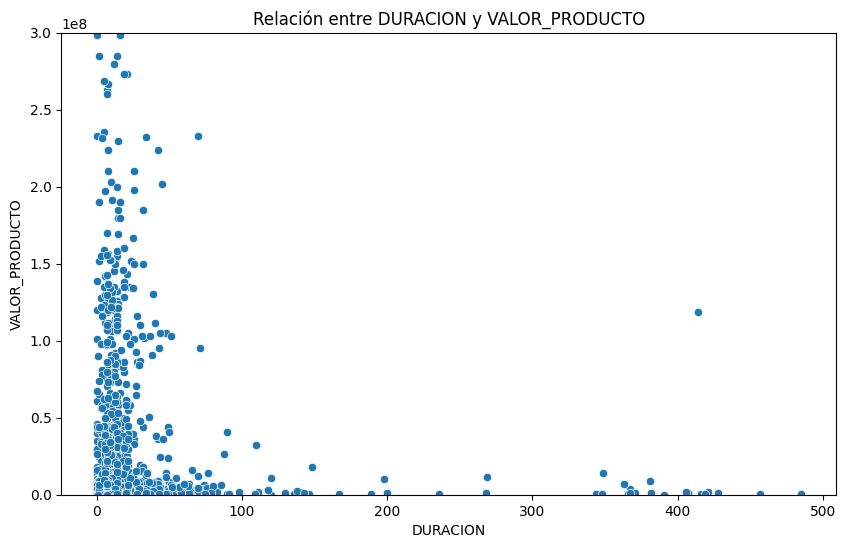

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de algunas variables importantes
plt.figure(figsize=(10,6))
sns.histplot(data['DURACION'], kde=True)
plt.title('Distribución de la duración del proceso')
plt.show()

# Gráfico de dispersión entre dos variables relevantes
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='DURACION', y='VALOR_PRODUCTO')
plt.title('Relación entre DURACION y VALOR_PRODUCTO')
plt.ylim(0,300000000)
plt.show()

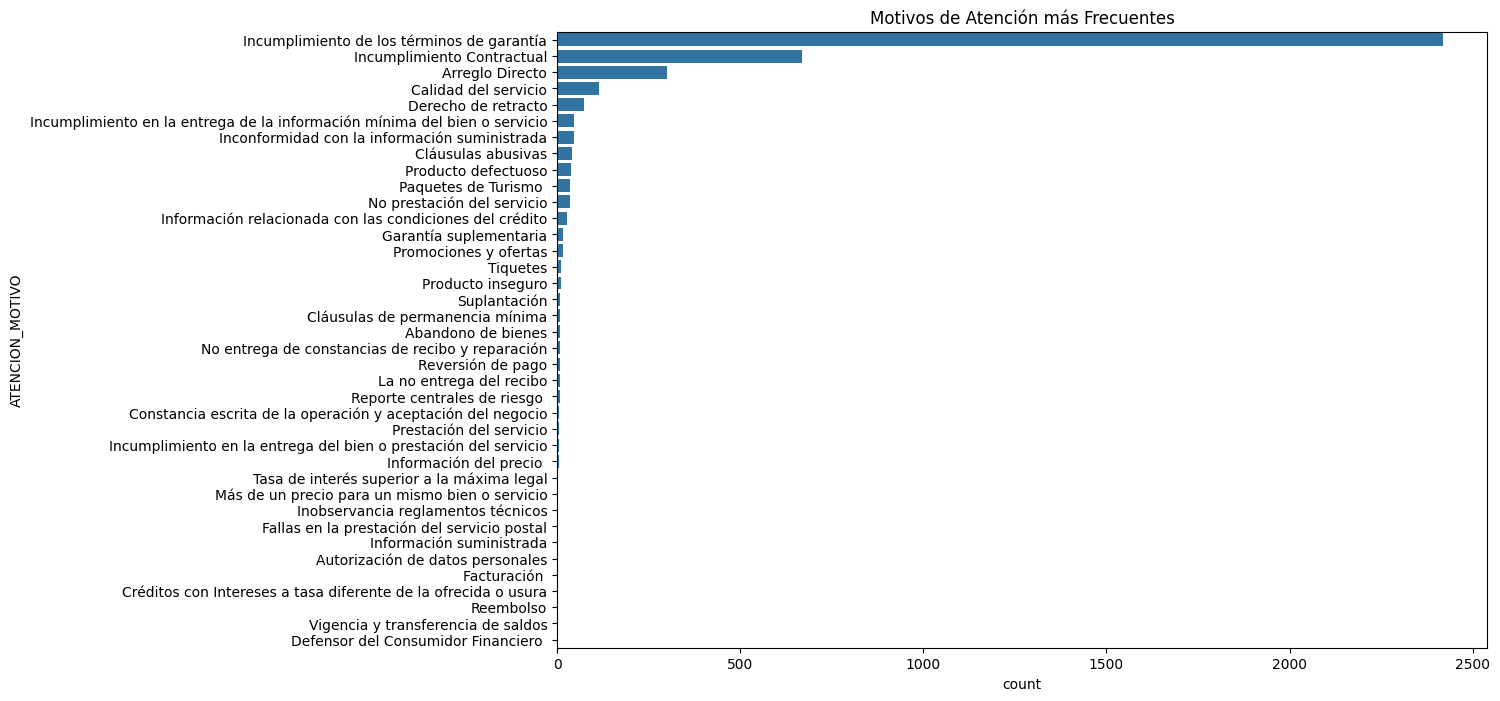

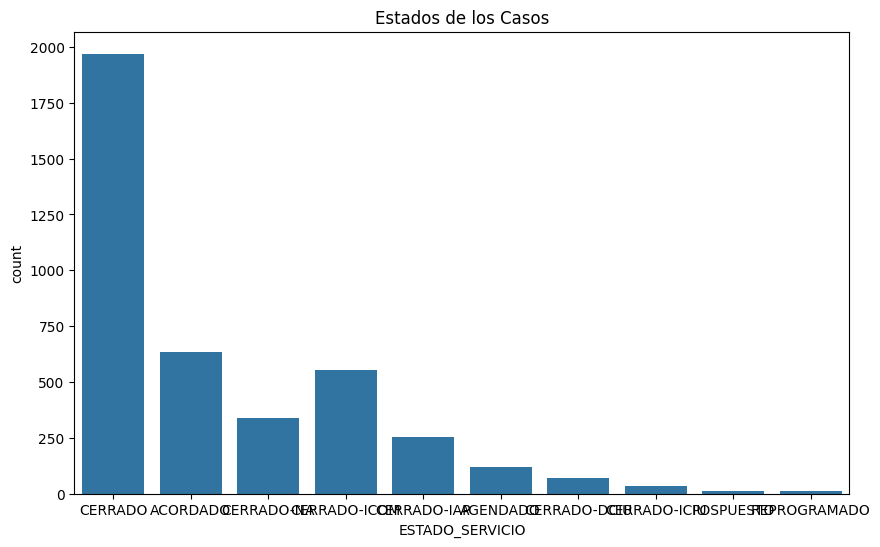

In [ ]:
# Gráfico de barras de ATENCION_MOTIVO
plt.figure(figsize=(12,8))
sns.countplot(y='ATENCION_MOTIVO', data=data, order=data['ATENCION_MOTIVO'].value_counts().index)
plt.title('Motivos de Atención más Frecuentes')
plt.show()

# Gráfico de barras de ESTADO_SERVICIO
plt.figure(figsize=(10,6))
sns.countplot(x='ESTADO_SERVICIO', data=data)
plt.title('Estados de los Casos')
plt.show()


### Prepocesamiento de los datos

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data_selec = data[['VALOR_PRODUCTO', 'DURACION', 'ESTADO_SERVICIO', 'DESTINO_CIUDAD', 'PERSONA_POBLACION_ESPECIAL', 'PERSONA_RANGO_EDAD', 'PERSONA_CONDICION_DISCAPACIDAD', 'PERSONA_GENERO']]
data_selec=data_selec.dropna()
data_selec=data_selec[data_selec['VALOR_PRODUCTO']<0.4e10].reset_index()
# Seleccionar las variables numéricas y categóricas
numeric_features = ['VALOR_PRODUCTO', 'DURACION']
categorical_features = ['ESTADO_SERVICIO', 'DESTINO_CIUDAD', 'PERSONA_POBLACION_ESPECIAL', 'PERSONA_RANGO_EDAD', 'PERSONA_CONDICION_DISCAPACIDAD', 'PERSONA_GENERO']

# Crear pipeline para preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Aplicar el preprocesamiento
data_selec_preprocessed = preprocessor.fit_transform(data_selec)

Inicialmente se procede a encontrar el codo con KneeLocator

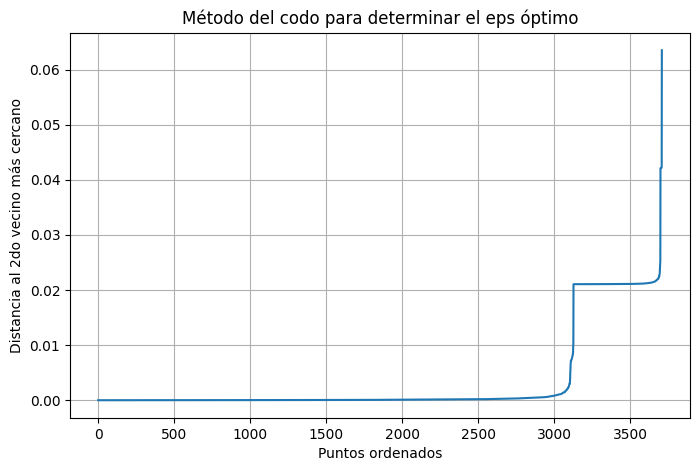

El valor óptimo de eps es: 0.04210745543241501


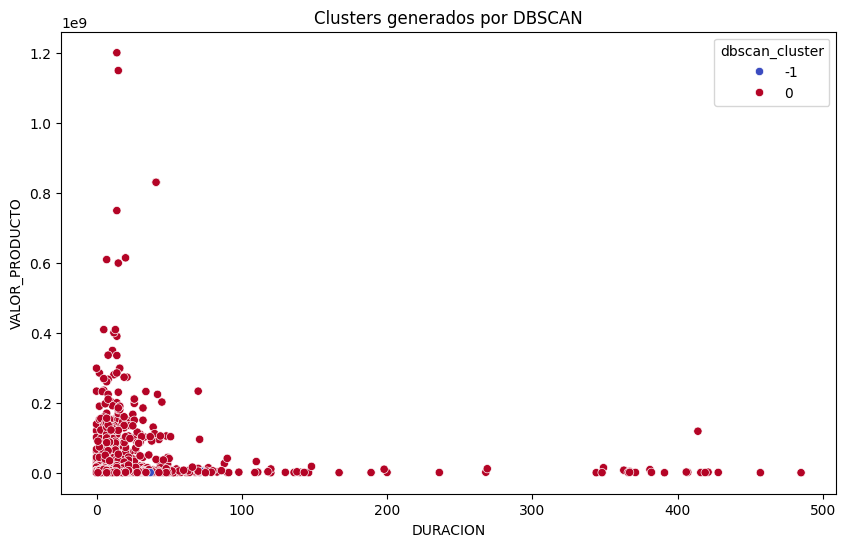

In [ ]:
from sklearn.cluster import DBSCAN
import gower
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir el conjunto de datos preprocesado en una matriz NumPy si aún no lo has hecho
data_selec_preprocessed = data_selec_preprocessed.toarray()

# Calcular la matriz de distancia de Gower
D = gower.gower_matrix(data_selec_preprocessed)

# Usar NearestNeighbors para encontrar las distancias al 2do vecino más cercano
neighbors = NearestNeighbors(n_neighbors=2, metric='precomputed')
neighbors_fit = neighbors.fit(D)
distances, indices = neighbors_fit.kneighbors(D)

# Ordenar las distancias al segundo vecino (excluyendo la distancia a sí mismo)
distances = np.sort(distances[:, 1])

# Graficar las distancias ordenadas
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al 2do vecino más cercano')
plt.title('Método del codo para determinar el eps óptimo')
plt.grid(True)
plt.show()

# Usar KneeLocator para encontrar el punto de rodilla
kl = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")

# Obtener el valor óptimo de eps
eps_optimo = distances[kl.elbow]
print(f"El valor óptimo de eps es: {eps_optimo}")

# Definir y ajustar el modelo DBSCAN con el eps óptimo
dbscan = DBSCAN(eps=eps_optimo, min_samples=5, metric='precomputed')
dbscan.fit(D)

# Añadir los clusters de DBSCAN a los datos originales
data_selec['dbscan_cluster'] = dbscan.labels_

# Convertir las columnas 'DURACION' y 'VALOR_PRODUCTO' a numéricas si es necesario
data_selec['DURACION'] = pd.to_numeric(data_selec['DURACION'], errors='coerce')
data_selec['VALOR_PRODUCTO'] = pd.to_numeric(data_selec['VALOR_PRODUCTO'], errors='coerce')

# Visualización de los clusters generados por DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_selec['DURACION'], y=data_selec['VALOR_PRODUCTO'], hue=data_selec['dbscan_cluster'], palette='coolwarm')
plt.title('Clusters generados por DBSCAN')
plt.show()

Se procede utilizando el punto de mayor pendiente superior a 0.02

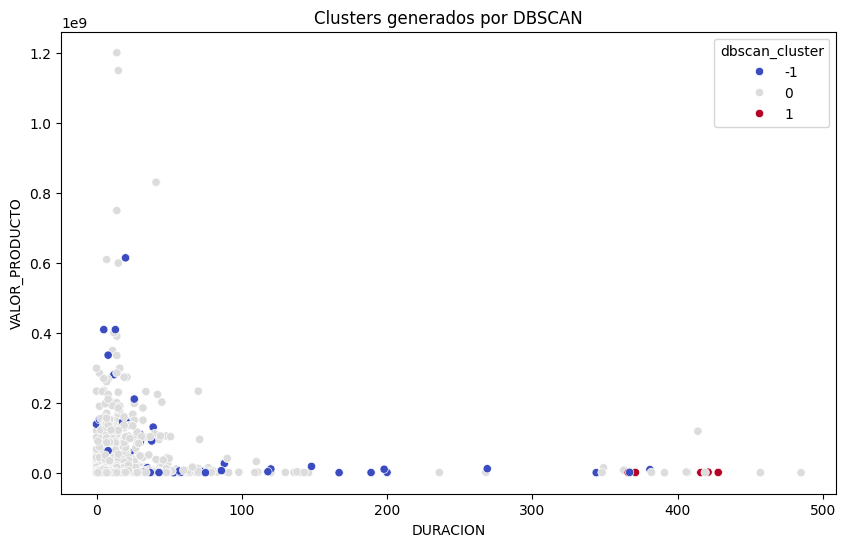

Número de clusters encontrados: 2
Número de puntos clasificados como ruido: 66


In [ ]:
from sklearn.cluster import DBSCAN
import gower

dbscan = DBSCAN(eps=0.0214, min_samples=3, metric='precomputed')
dbscan.fit(D)

# Añadir los clusters de DBSCAN a los datos originales
data_selec['dbscan_cluster'] = dbscan.labels_

# Visualización de clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=data_selec['DURACION'], y=data_selec['VALOR_PRODUCTO'], hue=data_selec['dbscan_cluster'], palette='coolwarm')
plt.title('Clusters generados por DBSCAN')
plt.show()

# Obtener las etiquetas asignadas por DBSCAN
labels = dbscan.labels_

# Contar el número de clusters (excluyendo la etiqueta -1 que representa ruido)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Contar el número de puntos clasificados como ruido
n_noise = list(labels).count(-1)

print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de puntos clasificados como ruido: {n_noise}")

In [ ]:
data_selec[data_selec['dbscan_cluster']==1]

,index,VALOR_PRODUCTO,DURACION,ESTADO_SERVICIO,DESTINO_CIUDAD,PERSONA_POBLACION_ESPECIAL,PERSONA_RANGO_EDAD,PERSONA_CONDICION_DISCAPACIDAD,PERSONA_GENERO,dbscan_cluster
1482,1559,1621700.0,421,CERRADO,CHAPINERO,Ninguna,41-59 años,Ninguna,Hombre,1
1483,1560,790000.0,366,CERRADO,CHAPINERO,Ninguna,60-80 años,Ninguna,Hombre,1
1545,1624,600000.0,416,CERRADO,CHAPINERO,Adulto mayor,60-80 años,Ninguna,Hombre,1
2620,2784,827200.0,428,CERRADO,CHAPINERO,Ninguna,60-80 años,Ninguna,Hombre,1
2962,3137,800000.0,371,CERRADO,CHAPINERO,Ninguna,41-59 años,Ninguna,Hombre,1


In [ ]:
data_selec[data_selec['DESTINO_CIUDAD']=='CHAPINERO']

,index,VALOR_PRODUCTO,DURACION,ESTADO_SERVICIO,DESTINO_CIUDAD,PERSONA_POBLACION_ESPECIAL,PERSONA_RANGO_EDAD,PERSONA_CONDICION_DISCAPACIDAD,PERSONA_GENERO,dbscan_cluster
1482,1559,1621700.0,421,CERRADO,CHAPINERO,Ninguna,41-59 años,Ninguna,Hombre,1
1483,1560,790000.0,366,CERRADO,CHAPINERO,Ninguna,60-80 años,Ninguna,Hombre,1
1545,1624,600000.0,416,CERRADO,CHAPINERO,Adulto mayor,60-80 años,Ninguna,Hombre,1
2620,2784,827200.0,428,CERRADO,CHAPINERO,Ninguna,60-80 años,Ninguna,Hombre,1
2962,3137,800000.0,371,CERRADO,CHAPINERO,Ninguna,41-59 años,Ninguna,Hombre,1
3633,3907,122000000.0,10,CERRADO,CHAPINERO,Ninguna,26-40 años,Ninguna,Hombre,0


Utilizando estas condiciones con el algoritmo DBSCAN se pudo encontrar un patrón para el comportamiento cuando la variable `DESTINO_CIUDAD=='CHAPINERO'` dentro del set de datos que se tiene, 5 de los 6 casos recibidos presentan duraciones considerablemente altas con respecto a la media de duración, considerando que el caso que tiene una duración en resolución tiene un VALOR_PRODUCTO alto, podría considerarse una falta de igualdad en la toma de los procesos por parte de la sede. Esto sugiere un punto de análisis por parte de la entidad